RETRIEVING AND PROCESSING OPENSOURCE IMAGERY(RASTERS)

Since we do not need to perform multi/hyperspectral image analytics, a simple RGB raster is sufficent. To download a 3-Band Analytic PlanetScope asset using Python, we use the Planet API. First, sign up for a Planet API key and install the requests library. It is free for education and research purposes.

In [ ]:
pip install requests

In [ ]:
import os
import requests
from requests.auth import HTTPBasicAuth

In [ ]:

# Replace 'YOUR_API_KEY' with your Planet API key
API_KEY = '************************************'

# Replace 'ITEM_ID' with the ID of the PlanetScope item you want to download
ITEM_ID = '1328d2a6-1556-4e00-8471-a3728816e58b'

# Replace 'DOWNLOAD_DIRECTORY' with the directory where you want to save the downloaded file
DOWNLOAD_DIRECTORY = '/Users/rugi/Documents/geospatial_exercise'

def download_planet_asset(api_key, item_id, download_directory):
    # Set the base URL for the Planet API
    base_url = 'https://api.planet.com/data/v1/item-types/{}/items/{}/assets/'.format('PSScene3Band', item_id)

    # Set the asset type for 3-Band Analytic PlanetScope
    asset_type = 'visual'

    # Construct the asset URL
    asset_url = '{}{}/'.format(base_url, asset_type)

    # Set the download URL for the asset
    download_url = requests.get(asset_url, auth=HTTPBasicAuth(api_key, '')).json()['location']

    # Set the output file path
    output_file_path = os.path.join(download_directory, '{}.tif'.format(item_id))

    # Download the asset
    response = requests.get(download_url, stream=True)
    with open(output_file_path, 'wb') as output_file:
        for chunk in response.iter_content(chunk_size=128):
            output_file.write(chunk)

    print('Download complete. Saved at:', output_file_path)

if __name__ == "__main__":
    download_planet_asset(API_KEY, ITEM_ID, DOWNLOAD_DIRECTORY)


The API and item ID creates links to the orders placed at Planet from which the data is directly downloaded whole or in parts for larger area of interest (AOI)

In [ ]:
#Downloading a 3-Band Analytic PlanetScope asset
!curl -O -J https://hello.planet.com/data/s/UG2TX98suVmmi9q/download

# downloading XML metadata
!curl -O -J https://hello.planet.com/data/s/jqDQE8xUHiD511e/download

In [2]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import matplotlib.pyplot as plt

Since our area of interest was big (Berlin), the data was downloaded as separate (16) scenes, therefore we need to merge to form one large raster of the whole AOI

In [ ]:
# Function to merge raster files
def merge_rasters(raster_files, output_path):
    src_files_to_mosaic = []
    for fp in raster_files:
        src = rasterio.open(fp)
        src_files_to_mosaic.append(src)

    mosaic, out_trans = merge(src_files_to_mosaic)
    
    out_meta = src.meta.copy()
    out_meta.update({
        "driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": out_trans
    })
    
    with rasterio.open(output_path, "w", **out_meta) as dest:
        dest.write(mosaic)
    
    return output_path


# List of dowloaded raster files to merge
raster_files = [
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_092719_78_24ab_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_093034_23_24af_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_093036_31_24af_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_101821_00_24f8_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_101823_21_24f8_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_101825_43_24f8_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_101827_64_24f8_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_101829_86_24f8_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_101854_04_24bd_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_101856_26_24bd_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_101858_48_24bd_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_101900_70_24bd_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_102111_28_24df_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_102113_48_24df_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_102115_69_24df_3B_Visual_clip.tif',
    '/Users/rugi/Documents/geospatial_exercise/Berlin_psscene_visual/PSScene/20240629_102117_89_24df_3B_Visual_clip.tif',

    # Add more raster file paths as needed
]

# Path to the output merged raster file
output_path = 'berlin_merged_raster.tif'

# Merge rasters
merged_raster_path = merge_rasters(raster_files, output_path)


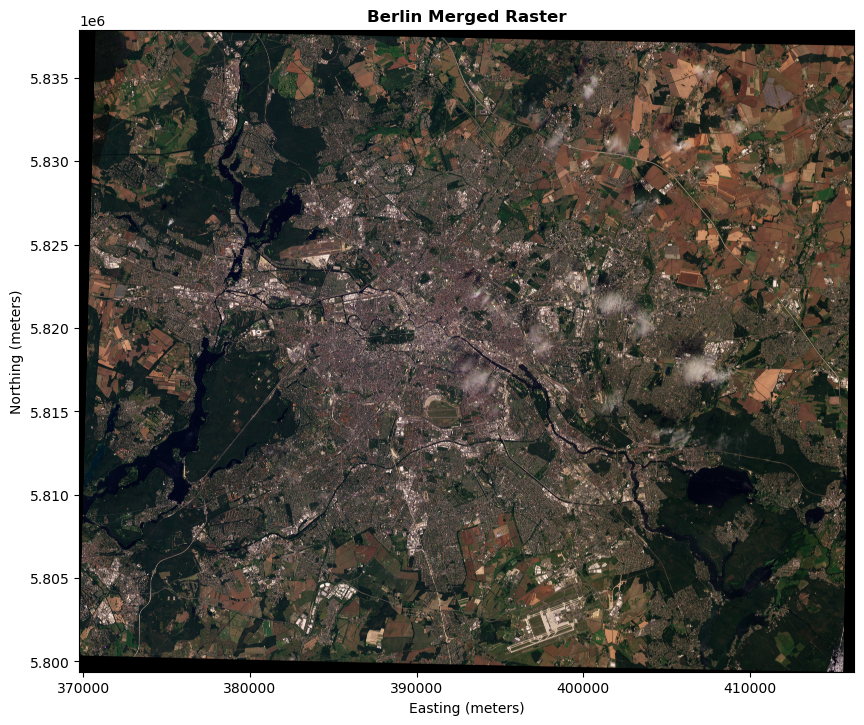

In [3]:
#plot merged raster
def plot_raster(raster_path):
    with rasterio.open(raster_path) as src:
        fig, ax = plt.subplots(figsize=(10, 10))
        show(src, ax=ax, title="Berlin Merged Raster")
        ax.set_xlabel("Longitude (degrees)" if src.crs.is_geographic else "Easting (meters)")
        ax.set_ylabel("Latitude (degrees)" if src.crs.is_geographic else "Northing (meters)")
        plt.show()

# Example usage
plot_raster('berlin_merged_raster.tif')

RETRIEVING AND PROCESSING OPENSTREET MAPS (VECTORS)

/var/folders/dj/q4610r9918b3f4w66lymyrsr0000gn/T/ipykernel_83365/2473494623.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(shapefile_path, driver='ESRI Shapefile')


Shapefile saved to berlin_osm_shapefile.shp


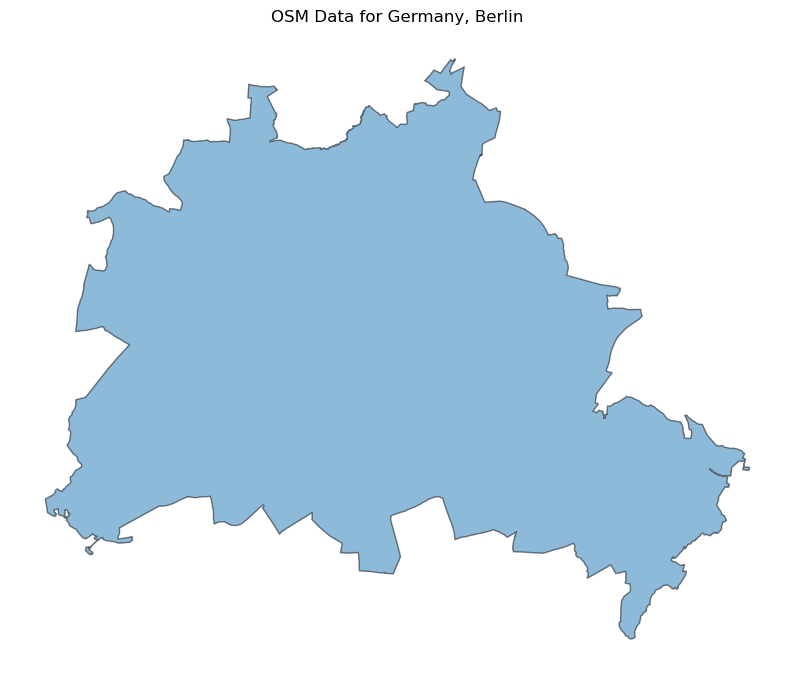

Plot saved to berlin_osm_plot.png


In [8]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

def download_and_plot_osm_data(place_name, shapefile_path, plot_path):
    """
    Downloads OpenStreetMap data for a specified place, saves it as a shapefile, and plots the data.

    Parameters:
    - place_name: str, name of the place to download the data for (e.g., "Germany, Berlin").
    - shapefile_path: str, path to the output shapefile.
    - plot_path: str, path to the output plot image.
    """
    # Download the data
    gdf = ox.geocode_to_gdf(place_name)
    
    # Save the data as a shapefile
    gdf.to_file(shapefile_path, driver='ESRI Shapefile')
    print(f"Shapefile saved to {shapefile_path}")

    # Plot the data
    ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
    plt.title(f"OSM Data for {place_name}")
    plt.axis('off')

    # Save the plot
    plt.savefig(plot_path, bbox_inches='tight', pad_inches=0.1)
    plt.show()
    print(f"Plot saved to {plot_path}")

# Define the place name, shapefile path, and plot path, this gets the boundaries of area of interest
place_name = 'Germany, Berlin'
shapefile_path = 'berlin_osm_shapefile.shp'
plot_path = 'berlin_osm_plot.png'

# Download, save, and plot the data
download_and_plot_osm_data(place_name, shapefile_path, plot_path)


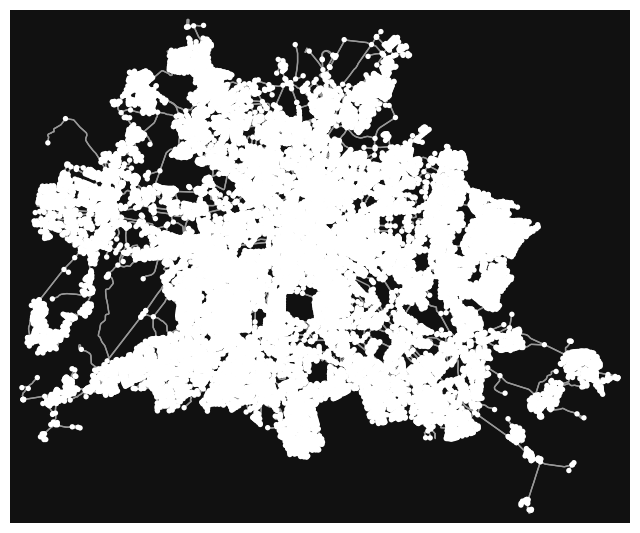

In [10]:
# create a graph of a place's drivable roads then plot it
road = ox.graph_from_place('Berlin, Germany', network_type='drive')
fig, ax = ox.plot_graph(road)

prj_road = ox.project_graph(road)

road = ox.graph_from_place('Berlin, Germany')
ox.plot_graph(road)


In [11]:
# save the network model to disk as a shapefile
ox.save_graph_shapefile(road, filepath = r'/Users/rugi/Documents/geospatial_exercise/OSMdata')

/Applications/anaconda3/envs/autogis/lib/python3.11/site-packages/osmnx/io.py:87: UserWarning: The `save_graph_shapefile` function is deprecated and will be removed in a future release. Instead, use the `save_graph_geopackage` function to save graphs as GeoPackage files for subsequent GIS analysis.
  warnings.warn(
/Applications/anaconda3/envs/autogis/lib/python3.11/site-packages/osmnx/io.py:114: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


NOTE: edges mean roads as per OSMNx documentation (not always) but certainly so for current use case

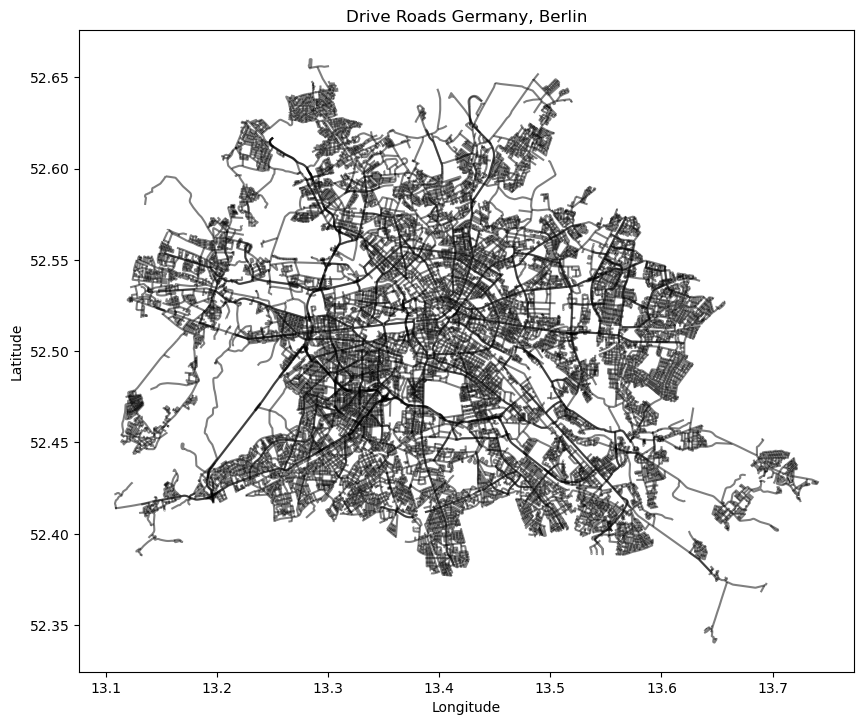

In [13]:

# Function to load and plot a shapefile
def plot_shapefile(shapefile_path):
    # Load the shapefile
    gdf = gpd.read_file(shapefile_path)
    
    # Plot the shapefile
    gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
    plt.title(f"Drive Roads {place_name}")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Path to your shapefile
shapefile_path = '/Users/rugi/Documents/geospatial_exercise/OSMdata/edges.shp'

# Plot the shapefile
plot_shapefile(shapefile_path)


In [14]:
#Import and read satellite imagery and OSM data
satellite_image_path = 'berlin_merged_raster.tiff'
osm_data_path = '/Users/rugi/Documents/geospatial_exercise/OSMdata/edges.shp'

In [15]:
# impute speed on all edges missing data
road = ox.add_edge_speeds(road)

# see mean speed/time values by road type
edges = ox.graph_to_gdfs(road, nodes=False)
edges["highway"] = edges["highway"].astype(str)
edges.groupby("highway")[["length", "speed_kph"]].mean().round(1)

,length,speed_kph
highway,,
"['living_street', 'residential']",239.7,29.1
"['living_street', 'unclassified']",245.0,30.0
"['motorway_link', 'motorway']",756.6,65.3
"['motorway_link', 'primary_link']",311.0,55.0
"['motorway_link', 'secondary']",251.2,56.7
"['primary', 'motorway']",452.0,63.0
"['primary', 'primary_link']",572.5,47.5
"['primary_link', 'motorway_link', 'motorway']",326.3,50.0
"['primary_link', 'primary']",522.9,41.7


Filtering OSM roads by speed and direction 

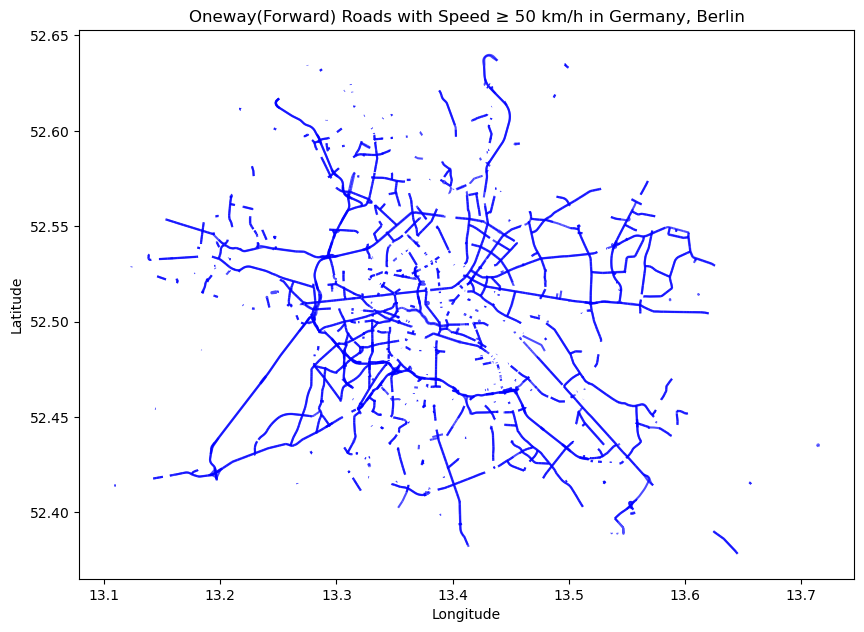

In [16]:
#set the speed threshold in kph
speed_threshold = 50

# Filter out highways with speed greater than or equal to the threshold and direction of travel is forward
filtered_roads = edges[(edges["speed_kph"] >= speed_threshold) & (edges["oneway"] == True)]

# Plot the filtered highways
ax = filtered_roads.plot(figsize=(10, 10), alpha=0.7, edgecolor='b')
plt.title(f"Oneway(Forward) Roads with Speed ≥ {speed_threshold} km/h in {place_name}")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Identify and convert unsupported data types direct shapefile creation caused "ValueError: Invalid field type <class 'list'>" means there might still be columns with unsupported data types. We need to ensure that all fields have supported types by thoroughly inspecting and converting any problematic columns.

In [20]:
# Inspect data types
print("Original data types:")
print(filtered_roads.dtypes)

# Identify and convert unsupported data types
for col in filtered_roads.columns:
    if filtered_roads[col].apply(lambda x: isinstance(x, (list, dict))).any():
        filtered_roads[col] = filtered_roads[col].apply(lambda x: str(x) if isinstance(x, (list, dict)) else x)

# Check for null values and handle them
filtered_roads = filtered_roads.fillna('')

# Inspect data types again
print("Data types after conversion:")
print(filtered_roads.dtypes)

# Save the filtered roads to a shapefile
output_shapefile = '/Users/rugi/Documents/geospatial_exercise/OSMdata/roads_filtered.shp'
filtered_roads.to_file(output_shapefile, driver='ESRI Shapefile')

print(f"Filtered shapefile saved to {output_shapefile}")


Original data types:
osmid          object
lanes          object
name           object
highway        object
maxspeed       object
oneway           bool
reversed         bool
length        float64
geometry     geometry
speed_kph     float64
width          object
ref            object
bridge         object
tunnel         object
junction       object
access         object
area           object
service        object
est_width      object
dtype: object
Data types after conversion:
osmid          object
lanes          object
name           object
highway        object
maxspeed       object
oneway           bool
reversed         bool
length        float64
geometry     geometry
speed_kph     float64
width          object
ref            object
bridge         object
tunnel         object
junction       object
access         object
area           object
service        object
est_width      object
dtype: object
Filtered shapefile saved to /Users/rugi/Documents/geospatial_exercise/OSMdata/roads_fi

In [22]:
# Print the CRS of each shapefile
print("CRS of roads:", filtered_roads.crs)

CRS of roads: epsg:4326


Notice the roads are in EPSG 4326. Many tools, including the buffer tool, do not work very well or at all with degree data. Since your our data seem to be localised, we therefore reproject it into e.g. a UTM system that is based in metres

In [27]:
#Read the existing shapefile
# Load the original shapefile
input_shapefile = '/Users/rugi/Documents/geospatial_exercise/OSMdata/roads_filtered.shp'
gdf = gpd.read_file(input_shapefile)

#Reproject the shapefile to EPSG:25833
gdf_reprojected = gdf.to_crs(epsg=25833)

#Save the reprojected shapefile
output_shapefile = '/Users/rugi/Documents/geospatial_exercise/OSMdata/roads_reprojected_filtered.shp'
gdf_reprojected.to_file(output_shapefile)

print(f"Shapefile reprojected to EPSG:25833 and saved to {output_shapefile}")


Shapefile reprojected to EPSG:25833 and saved to /Users/rugi/Documents/geospatial_exercise/OSMdata/roads_reprojected_filtered.shp


Buffering the roads to centreline

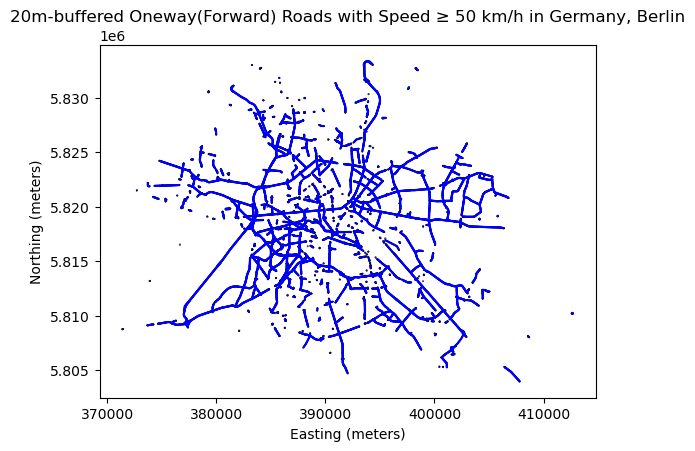

In [36]:
# Load the original shapefile
input_shapefile = '/Users/rugi/Documents/geospatial_exercise/OSMdata/roads_reprojected_filtered.shp'
gdf = gpd.read_file(input_shapefile)

# Buffer the geometries by 20 meters
buffer_distance = 20  # in meters
gdf_buffered = gdf.copy()
gdf_buffered['geometry'] = gdf['geometry'].buffer(buffer_distance)

# Plot the original and buffered geometries
fig, ax = plt.subplots()
plt.title(f"20m-buffered Oneway(Forward) Roads with Speed ≥ {speed_threshold} km/h in {place_name}")

gdf.plot(ax=ax, color='blue', edgecolor='black')
gdf_buffered.plot(ax=ax, color='red', edgecolor='black')

plt.xlabel("Longitude (degrees)" if gdf.crs.is_geographic else "Easting (meters)")
plt.ylabel("Latitude (degrees)" if gdf.crs.is_geographic else "Northing (meters)")

plt.show()

In [37]:
# Save the buffered geometries as a new shapefile
output_shapefile = '/Users/rugi/Documents/geospatial_exercise/OSMdata/roads_buffered_reprojected_filtered.shp'
gdf_buffered.to_file(output_shapefile)

output_shapefile

'/Users/rugi/Documents/geospatial_exercise/OSMdata/roads_buffered_reprojected_filtered.shp'

RASTER-VECTOR PROCESSING

In [38]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
from rasterio.warp import calculate_default_transform, reproject, Resampling
import numpy as np

import os
import imageio

import matplotlib.pyplot as plt
from rasterio.windows import Window

Clip Satellite Image with Buffer and Reproject to EPSG:25833

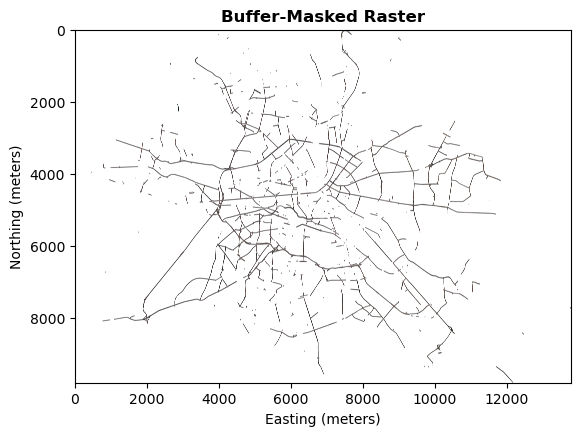

In [51]:
# Load the vector data
vector_file = '/Users/rugi/Documents/geospatial_exercise/OSMdata/roads_buffered_reprojected_filtered.shp'
vector_data = gpd.read_file(vector_file)

# Load the raster data
raster_file = '/Users/rugi/Documents/geospatial_exercise/berlin_merged_raster.tif'
raster_data = rasterio.open(raster_file)

# Ensure CRS match or reproject vector_data to raster_data's CRS if necessary otherwise they cause value error by mismatch/no overlap
vector_data = vector_data.to_crs(raster_data.crs)

# Clip the raster with the vector
clipped_data, transform = mask(raster_data, vector_data.geometry, crop=True)

# Define the path to save the clipped(masked) raster
clipped_raster_file = '/Users/rugi/Documents/geospatial_exercise/berlin_masked.tif'

# Save the clipped(masked) raster
clipped_meta = raster_data.meta.copy()
clipped_meta.update({
    'driver': 'GTiff',
    'height': clipped_data.shape[1],
    'width': clipped_data.shape[2],
    'transform': transform
})

with rasterio.open(clipped_raster_file, 'w', **clipped_meta) as dest:
    dest.write(clipped_data)

# Plot the clipped raster

plt.xlabel("Longitude (degrees)" if vector_data.crs.is_geographic else "Easting (meters)")
plt.ylabel("Latitude (degrees)" if vector_data.crs.is_geographic else "Northing (meters)")

show(clipped_data, title="Buffer-Masked Raster")

# Reproject the clipped data to EPSG:25833
target_crs = 'EPSG:25833'

# Define output file for reprojected data
reprojected_file = '/Users/rugi/Documents/geospatial_exercise/berlin_reprojected.tif'

# Reproject each band separately
num_bands = clipped_data.shape[0]
kwargs = raster_data.meta.copy()
kwargs.update({
    'crs': target_crs,
    'transform': transform,
    'width': clipped_data.shape[2],
    'height': clipped_data.shape[1]
})

with rasterio.open(reprojected_file, 'w', **kwargs) as dst:
    for band_idx in range(num_bands):
        reprojected_band = np.zeros((clipped_data.shape[1], clipped_data.shape[2]), clipped_data.dtype)
        reproject(
            source=clipped_data[band_idx, :, :],
            destination=reprojected_band,
            src_transform=raster_data.transform,  # Use transform from original raster_data new has no transform attribute
            src_crs=raster_data.crs,  # Use CRS from original raster_data
            dst_transform=transform,
            dst_crs=target_crs,
            resampling=Resampling.nearest
        )
        dst.write(reprojected_band, band_idx + 1)

# Close the raster data
raster_data.close()

Creating Tiles of Reprojected Raster

In [50]:
# Define the output directory for tiles
output_dir = '/Users/rugi/Documents/geospatial_exercise/tiled_image_patches'

# Function to save tiles
def save_tiles(raster_file, output_dir, tile_size=512):
    with rasterio.open(raster_file) as src:
        num_tiles_y = src.height // tile_size
        num_tiles_x = src.width // tile_size

        for tile_y in range(num_tiles_y):
            for tile_x in range(num_tiles_x):
                window = Window(
                    tile_x * tile_size, tile_y * tile_size, tile_size, tile_size
                )
                tile_transform = rasterio.windows.transform(window, src.transform)
                tile_data = src.read(window=window)

                # Convert RGBA to RGB if necessary
                if src.count == 4:
                    tile_data = tile_data[:3, :, :]  # Keep only RGB channels

                # Plot the tile, commented out because too many plots otherwise found in output directory
                #plt.figure()
                #plt.imshow(np.moveaxis(tile_data, 0, -1))
                #plt.title(f'Tile ({tile_y}, {tile_x})')
                #plt.show()

                # Define output tile file path
                tile_file = os.path.join(output_dir, f'tile_{tile_y}_{tile_x}.jpg')

                # Save tile as JPEG
                # Assuming tile_data is in uint8 range (0-255)
                tile_data = np.moveaxis(tile_data, 0, -1)  # Move bands to last dimension
                imageio.imwrite(tile_file, tile_data.astype(np.uint8))

# Save tiles of the reprojected data
save_tiles(reprojected_file, output_dir)
print(f"Reprojected tiles save to {output_dir}")

Reprojected tiles save to /Users/rugi/Documents/geospatial_exercise/tiled_image_patches


THANK YOU!